# WeatherPy
----

#Observations:
#1.Based of the Linear Regressions models of Max Temp and Latitude, you can see strong correlations between the #two. As you get closer to 0 on Latitude, the higher the Max Temp is.
#2.Wind Speed slows down as you get closer to the equator, with more of a change in the Souther Hemisphere.
#3.Cloudiness is to scattered to make any definitive assumptions.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create variables to hold data from requests
resp_obj = []
cities_2 = []
cloudiness = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

counts = 0
sets = 1


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Create loop to cycle through requests and pull specific data
print("Beginning Data Retrieval")
print("------------------------------")
for city in cities:
    weather_json = requests.get(query_url + city).json()
        
    try:
        resp_obj.append(weather_json)
        cloudiness.append(weather_json["clouds"]["all"])
        countries.append(weather_json["sys"]["country"])
        dates.append(weather_json['dt'])
        humidities.append(weather_json['main']['humidity'])
        lats.append(weather_json["coord"]['lat'])
        lngs.append(weather_json["coord"]['lon'])
        max_temps.append(weather_json["main"]["temp_max"])
        wind_speeds.append(weather_json['wind']['speed'])
        
        if counts > 49:
            counts = 1
            sets += 1
            cities_2.append(city)
        else:
            counts +=1
            cities_2.append(city)
        print(f'Processing Record {counts} of Set {sets}  | {city}')
        
    except:
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1  | mataura
Processing Record 2 of Set 1  | ribeira grande
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 1  | katsuura
Processing Record 4 of Set 1  | vaini
Processing Record 5 of Set 1  | burns lake
Processing Record 6 of Set 1  | djambala
Processing Record 7 of Set 1  | busselton
Processing Record 8 of Set 1  | minas
Processing Record 9 of Set 1  | punta arenas
Processing Record 10 of Set 1  | tiksi
Processing Record 11 of Set 1  | victoria
Processing Record 12 of Set 1  | aksarka
Processing Record 13 of Set 1  | fortuna
Processing Record 14 of Set 1  | pisco
Processing Record 15 of Set 1  | cape town
Processing Record 16 of Set 1  | bengkulu
Processing Record 17 of Set 1  | at-bashi
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 1  | esperance
Processing Record 19 of Set 1  | port alfred
Processing Record 20 of Set 1  | hobart


Processing Record 36 of Set 4  | ephrata
Processing Record 37 of Set 4  | raub
Processing Record 38 of Set 4  | torbay
Processing Record 39 of Set 4  | rio gallegos
Processing Record 40 of Set 4  | cherskiy
Processing Record 41 of Set 4  | husavik
Processing Record 42 of Set 4  | sao joao da barra
Processing Record 43 of Set 4  | poronaysk
Processing Record 44 of Set 4  | hambantota
Processing Record 45 of Set 4  | kahului
Processing Record 46 of Set 4  | roma
Processing Record 47 of Set 4  | shubarshi
Processing Record 48 of Set 4  | kushmurun
Processing Record 49 of Set 4  | faya
Processing Record 50 of Set 4  | hualmay
Processing Record 1 of Set 5  | avarua
Processing Record 2 of Set 5  | trelew
Processing Record 3 of Set 5  | nefteyugansk
City not found. Skipping...
Processing Record 4 of Set 5  | chaihe
City not found. Skipping...
Processing Record 5 of Set 5  | aitape
Processing Record 6 of Set 5  | codrington
Processing Record 7 of Set 5  | nara
Processing Record 8 of Set 5  | k

Processing Record 20 of Set 8  | mercedes
Processing Record 21 of Set 8  | itaueira
Processing Record 22 of Set 8  | sehithwa
Processing Record 23 of Set 8  | sandwick
Processing Record 24 of Set 8  | abu samrah
Processing Record 25 of Set 8  | palmas bellas
City not found. Skipping...
Processing Record 26 of Set 8  | manuk mangkaw
City not found. Skipping...
Processing Record 27 of Set 8  | pasighat
Processing Record 28 of Set 8  | yar-sale
Processing Record 29 of Set 8  | ostersund
Processing Record 30 of Set 8  | watrous
Processing Record 31 of Set 8  | bilma
Processing Record 32 of Set 8  | roebourne
Processing Record 33 of Set 8  | almaznyy
Processing Record 34 of Set 8  | oktyabrskiy
Processing Record 35 of Set 8  | xining
Processing Record 36 of Set 8  | abrau-dyurso
Processing Record 37 of Set 8  | grand gaube
Processing Record 38 of Set 8  | ndende
City not found. Skipping...
Processing Record 39 of Set 8  | biaora
Processing Record 40 of Set 8  | aktau
City not found. Skippin

Processing Record 5 of Set 12  | oktyabrskoye
Processing Record 6 of Set 12  | antalaha
Processing Record 7 of Set 12  | ahipara
Processing Record 8 of Set 12  | ambulu
Processing Record 9 of Set 12  | serov
Processing Record 10 of Set 12  | calabar
Processing Record 11 of Set 12  | myre
Processing Record 12 of Set 12  | sur
Processing Record 13 of Set 12  | tallahassee
Processing Record 14 of Set 12  | leh
Processing Record 15 of Set 12  | bantry
Processing Record 16 of Set 12  | sambava
Processing Record 17 of Set 12  | canatlan
Processing Record 18 of Set 12  | placido de castro
Processing Record 19 of Set 12  | shimoda
Processing Record 20 of Set 12  | la baneza
Processing Record 21 of Set 12  | toribio
Processing Record 22 of Set 12  | ende
Processing Record 23 of Set 12  | severo-yeniseyskiy
Processing Record 24 of Set 12  | ballyshannon
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of Set 12  | newport
Processing Record 26 of Set 12  | yushala
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Create dictionary for Data Frame
weather_dict = {
    "City" : cities_2,
    "Cloudiness" : cloudiness,
    "Country" : countries,
    "Date" : dates,  
    "Humidity" : humidities,
    "Lat" : lats, 
    "Lng" : lngs,
    "Max Temp" : max_temps,
    "Wind Speed" : wind_speeds
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Lat           584
Lng           584
Max Temp      584
Wind Speed    584
dtype: int64

In [17]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,76,NZ,1603765376,62,-46.19,168.86,57.99,5.99
1,ribeira grande,100,PT,1603765376,91,38.52,-28.70,68.49,13.47
2,katsuura,75,JP,1603765308,59,35.13,140.30,66.99,11.41
3,vaini,75,TO,1603765262,94,-21.20,-175.20,73.40,9.17
4,burns lake,100,CA,1603765377,84,54.23,-125.75,42.96,11.99


In [18]:
#Export Data to CSV file
weather_df.to_csv(output_data_file,index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

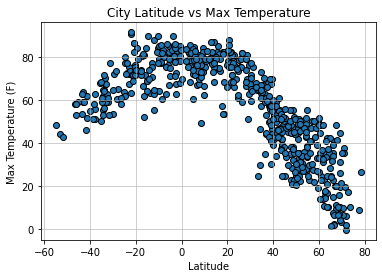

In [19]:
#Plotting
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], edgecolors="black")
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True,alpha=0.75)
plt.savefig("output_data/Max_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

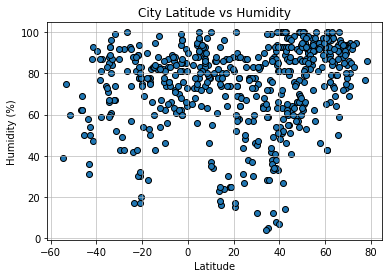

In [20]:
#Plotting
plt.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolors="black")
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True,alpha=0.75)
plt.savefig("output_data/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

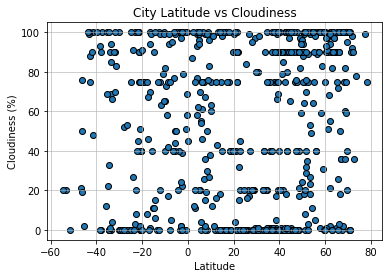

In [21]:
#Plotting
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],edgecolors="black")
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True,alpha=0.75)
plt.savefig("output_data/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

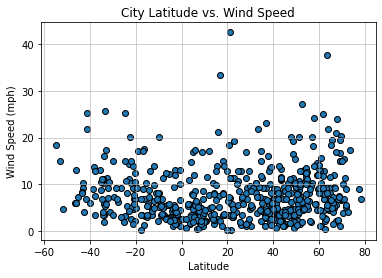

In [22]:
#Plotting
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],edgecolors="black")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True,alpha=0.75)
plt.savefig("output_data/Wind_Speed.png")
plt.show()

## Linear Regression

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots


In [24]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_df.loc[(weather_df["Lat"] >= 0)]
southern_hemi_df = weather_df.loc[(weather_df["Lat"] < 0)]
southern_hemi_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,76,NZ,1603765376,62,-46.19,168.86,57.99,5.99
3,vaini,75,TO,1603765262,94,-21.20,-175.20,73.40,9.17
5,djambala,100,CG,1603765377,96,-2.54,14.75,67.50,3.53
6,busselton,69,AU,1603765292,61,-33.65,115.33,70.00,5.99
7,minas,0,UY,1603765378,66,-34.38,-55.24,55.40,10.29
...,...,...,...,...,...,...,...,...,...
567,placido de castro,65,BR,1603765506,86,-10.34,-67.19,77.04,2.24
571,ende,42,ID,1603765507,65,-8.84,121.66,85.68,5.44
576,mlandizi,40,TZ,1603765508,88,-6.70,38.73,75.20,2.53
577,mount isa,75,AU,1603765311,17,-20.73,139.50,82.40,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.767327979582799


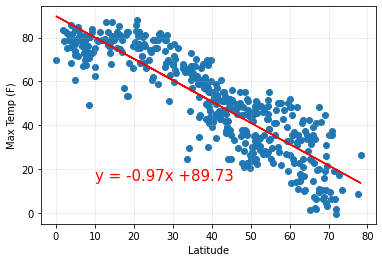

In [25]:
# Perform a linear regression on Max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
# Get regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plotting
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.grid(b=True,alpha=0.25)
plt.savefig("output_data/North_Max_Temp.png")
# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5060035995977762


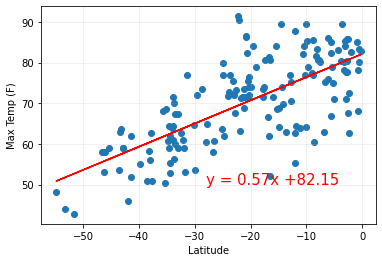

In [26]:
# Perform a linear regression on Max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
# Get regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plotting
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq,(-28,50),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.grid(b=True,alpha=0.25)
plt.savefig("output_data/South_Max_Temp.png")
# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0610061787604896


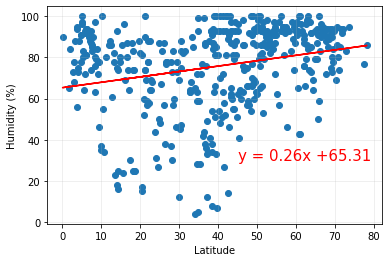

In [27]:
# Perform a linear regression on Max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
# Get regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plotting
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.grid(b=True,alpha=0.25)
plt.savefig("output_data/North_Humidity.png")
# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.031060615743854353


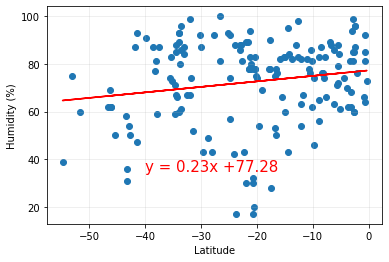

In [28]:
# Perform a linear regression on Max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
# Get regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plotting
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.grid(b=True,alpha=0.25)
plt.savefig("output_data/South_Humidity.png")
# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03801141100031339


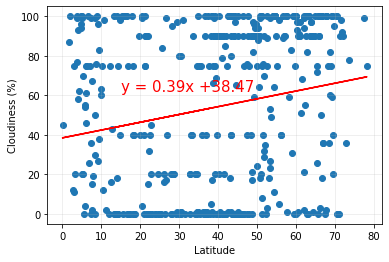

In [29]:
# Perform a linear regression on Max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
# Get regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plotting
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(15,62),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.grid(b=True,alpha=0.25)
plt.savefig("output_data/North_Cloudiness.png")
# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005630706909945525


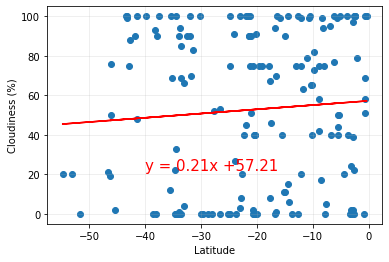

In [30]:
# Perform a linear regression on Max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
# Get regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plotting
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-40,22),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.grid(b=True,alpha=0.25)
plt.savefig("output_data/South_Cloudiness.png")
# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03444077902916559


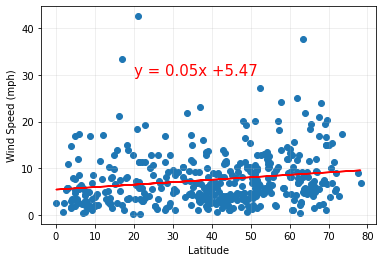

In [31]:
# Perform a linear regression on Max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
# Get regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plotting
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.grid(b=True,alpha=0.25)
plt.savefig("output_data/North_Wind_Speed.png")
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09775589500507086


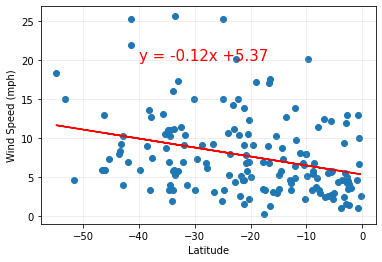

In [32]:
# Perform a linear regression on Max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
# Get regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plotting
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.grid(b=True,alpha=0.25)
plt.savefig("output_data/South_Wind_Speed.png")
# Show plot
plt.show()